<a href="https://colab.research.google.com/github/SRezaA102/MachineLearningTask/blob/main/Minggu7/7_XGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TUGAS 7
*   NAMA = Syahrul Reza Ananda
*   NIM = 1103210113
*   Model = XGB
*   Dataset = Melb_data.csv

# **Promp Chat-GPT**
1. Load the data of melb_data.csv that already exst on google drive
3. visualize the data
4. split the data 70% for data train
5. train using xgb, random forest, decision tree
6. evaluate

# **Import Library**

In [1]:
import pandas as pd
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from google.colab import drive

# **Memuat Data**

In [2]:
url = "/content/drive/MyDrive/Machine Learning/Minggu 7/melb_data.csv"
# Membaca file CSV dan membuat DataFrame
df = pd.read_csv(url)

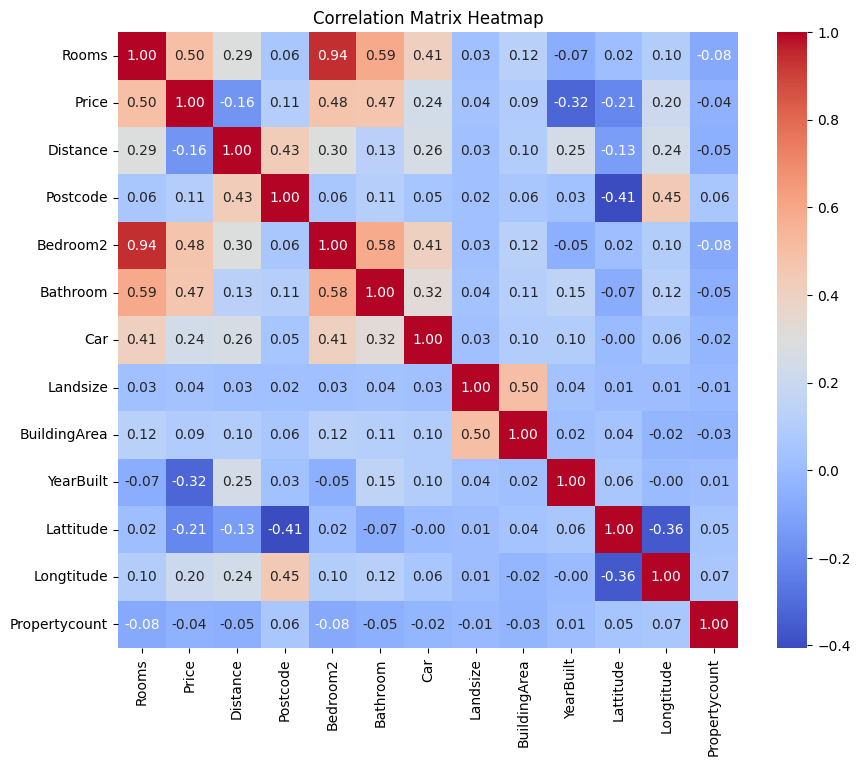

In [3]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Calculate the correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [4]:
# Feature Engineering (example only, you can add more feature engineering steps)
# For example, handling missing values, encoding categorical variables, etc.
# For demonstration, let's say we drop some columns and handle missing values
df.dropna(inplace=True) # Drop rows with missing target
selected_columns = ['Rooms', 'Bedroom2', 'Bathroom', 'Price']
df = df[selected_columns]

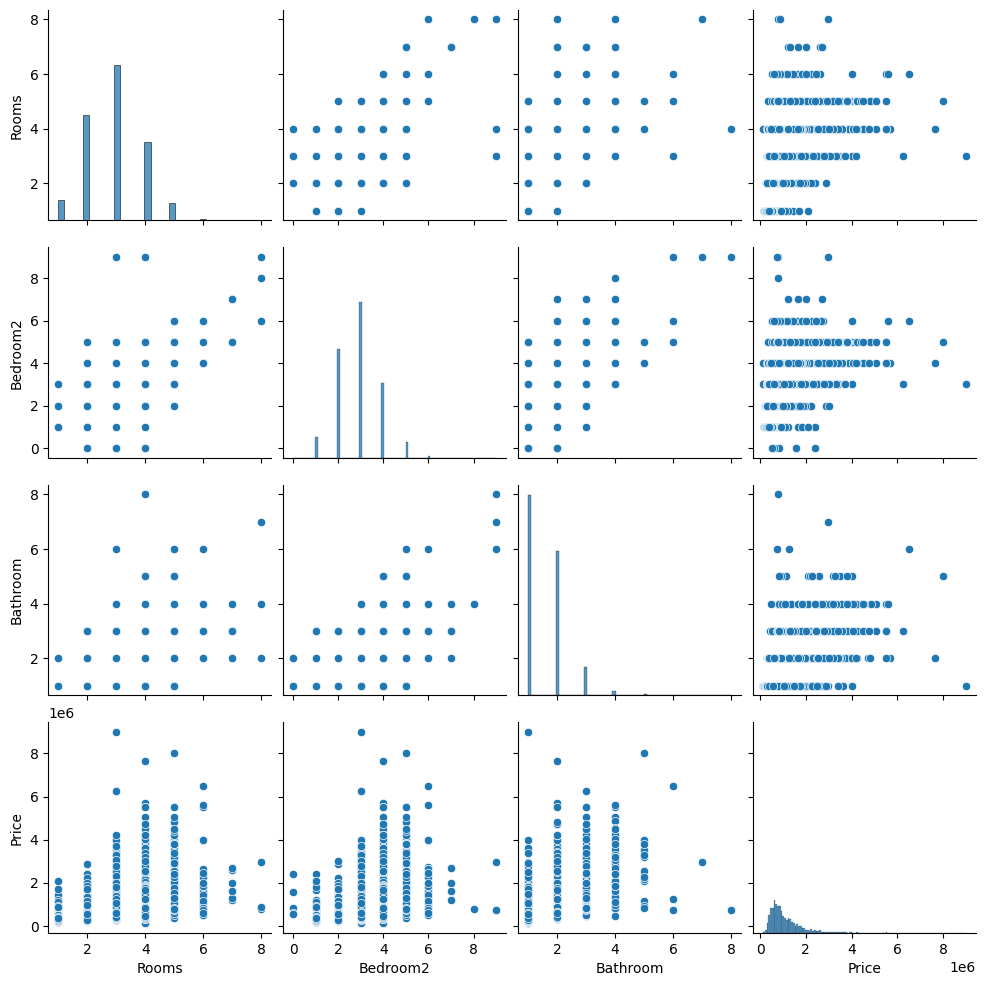

In [5]:
# Visualize the data (example only, you can add more visualization steps)
# For example, pairplots, correlation matrix, distribution plots, etc.
sns.pairplot(df)
plt.show()

In [6]:
# Split the data
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Train using XGBoost
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Train using Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Train using Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [8]:
# Evaluate using MAE for each model
xgb_pred = xgb_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
dt_pred = dt_model.predict(X_test)

xgb_mae = mean_absolute_error(y_test, xgb_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
dt_mae = mean_absolute_error(y_test, dt_pred)

print("XGBoost MAE:", xgb_mae)
print("Random Forest MAE:", rf_mae)
print("Decision Tree MAE:", dt_mae)

XGBoost MAE: 372792.985560113
Random Forest MAE: 371421.14060688915
Decision Tree MAE: 373346.9092053372
